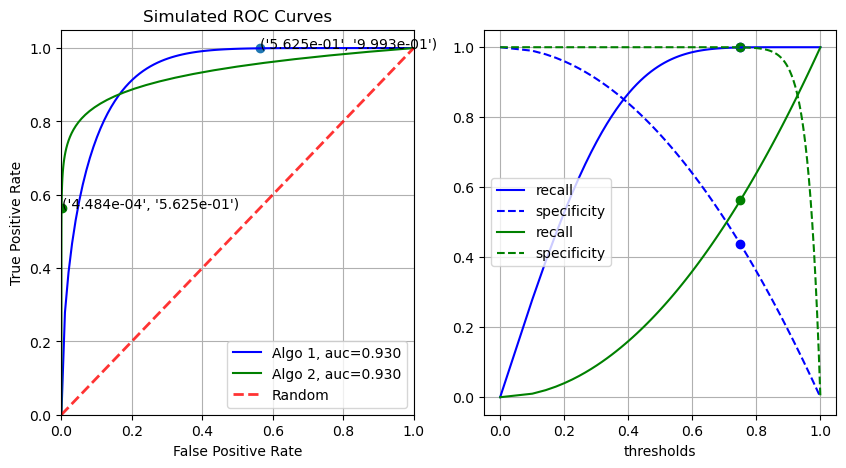

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, recall_score


thresholds = np.sqrt(np.linspace(0, 1, 100))

def algo1(thresholds):
    # both FPR and TPR increase, but TPR increases more rapidly.
    fpr = thresholds**2
    tpr = np.sqrt(1 - (1 - fpr)**8)
    return fpr, tpr

fpr_high_recall, tpr_high_recall = algo1(thresholds)
roc_auc_recall = auc(fpr_high_recall, tpr_high_recall)


def algo2(thresholds):
    # TPR increases slowly while FPR increases more quickly.
    fpr = thresholds**26.8  # Square to slow down the increase
    tpr = thresholds**2
    return fpr, tpr
    
fpr_high_specificity, tpr_high_specificity = algo2(thresholds)
roc_auc_spec = auc(fpr_high_specificity, tpr_high_specificity)


threshold = 0.75

fig, axes= plt.subplots(1,2, figsize=(10, 5))

ax = axes[0]
# Plot the high recall ROC curve
ax.plot(fpr_high_recall, tpr_high_recall, label=f'Algo 1, auc={roc_auc_recall:.3f}', color='blue')
ax.scatter(*algo1(threshold))
ax.text(*algo1(threshold), tuple(f"{x:.3e}" for x in algo1(threshold)))

# Plot the high specificity ROC curve
ax.plot(fpr_high_specificity, tpr_high_specificity, label=f'Algo 2, auc={roc_auc_spec:.3f}', color='green')
ax.scatter(*algo2(threshold), color='green')
ax.text(*algo2(threshold), tuple(f"{x:.3e}" for x in algo2(threshold)))

# Add random guess line
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=0.8)

# Add axis labels and legend
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Simulated ROC Curves')
ax.legend(loc="lower right")
ax.grid(True)

def recall(fpr, tpr):
    # Recall is the same as TPR in this context
    return tpr
def specificity(fpr, tpr):
    # Specificity is 1 - FPR
    return 1-fpr

recall_high_recall = recall(fpr_high_recall, tpr_high_recall)
specificity_high_recall = specificity(fpr_high_recall, tpr_high_recall)
recall_high_specificity = recall(fpr_high_specificity, tpr_high_specificity)
specificity_high_specificity = specificity(fpr_high_specificity, tpr_high_specificity)

ax = axes[1]
ax.plot(thresholds, recall_high_recall, label='recall', color='blue')
ax.plot(thresholds, specificity_high_recall, label='specificity', color='blue', ls='--')
ax.plot(thresholds, recall_high_specificity, label='recall', color='green')
ax.plot(thresholds, specificity_high_specificity, label='specificity', color='green', ls='--')
# ax.axvline(threshold, color='black')
ax.scatter(threshold, recall(*algo1(threshold)), color='blue')
ax.scatter(threshold, specificity(*algo1(threshold)), color='blue')
ax.scatter(threshold, recall(*algo2(threshold)), color='green')
ax.scatter(threshold, specificity(*algo2(threshold)), color='green')
ax.set_xlabel('thresholds')
ax.legend()
ax.grid(True)
plt.show()


green is good for spam detection = high detection of spams (high TPR) when we have a low FPR   
blue is good for covid test = we can afford to have some false positives if we reach a high tpr

sensitivity = tp / np.sqrt(fp)

if accuracy = 0.99 but 1 gamma for 100 protons => sensitivity = 1    

if we lower threshold in blue case starting from treshold ~=1,  recall stays high, spec decreases => we keep gamma detection high, but reject more protons


In [2]:
def weighted_accuracy(prevalence_positive, fpr, tpr):
    return prevalence_positive*tpr + (1-prevalence_positive)*(1-fpr)

In [3]:
weighted_accuracy(0.001, *algo1(threshold))

0.43806182866348997

In [4]:
weighted_accuracy(0.001, *algo2(threshold))

0.999114572891058

In [5]:
weighted_accuracy(0.999, *algo1(threshold))

0.9987668348264719

In [6]:
weighted_accuracy(0.999, *algo2(threshold))

0.5629370516245156